In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

In [3]:
size = 100  # size of the 2D grid
dx = 2. / size  # space step
T = 9.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

In [4]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [5]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

In [6]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

[[-0.89835761 -0.89835761 -0.85471949 ... -0.80866919 -0.88358308
  -0.88358308]
 [-0.89835761 -0.89835761 -0.85471949 ... -0.80866919 -0.88358308
  -0.88358308]
 [-0.88272712 -0.88272712 -0.82002882 ... -0.72758536 -0.8368742
  -0.8368742 ]
 ...
 [-0.82326241 -0.82326241 -0.73114712 ...  0.65973344  0.6661095
   0.6661095 ]
 [-0.89756148 -0.89756148 -0.84302839 ...  0.67447719  0.66924419
   0.66924419]
 [-0.89756148 -0.89756148 -0.84302839 ...  0.67447719  0.66924419
   0.66924419]]
[[-0.13798738 -0.13798738 -0.10043826 ... -0.07459063 -0.10312239
  -0.10312239]
 [-0.13798738 -0.13798738 -0.10043826 ... -0.07459063 -0.10312239
  -0.10312239]
 [-0.11485587 -0.11485587 -0.07688395 ... -0.04008105 -0.06943647
  -0.06943647]
 ...
 [-0.05300169 -0.05300169 -0.02588236 ...  0.3008362   0.31913644
   0.31913644]
 [-0.08898234 -0.08898234 -0.06034534 ...  0.31585496  0.33100059
   0.33100059]
 [-0.08898234 -0.08898234 -0.06034534 ...  0.31585496  0.33100059
   0.33100059]]


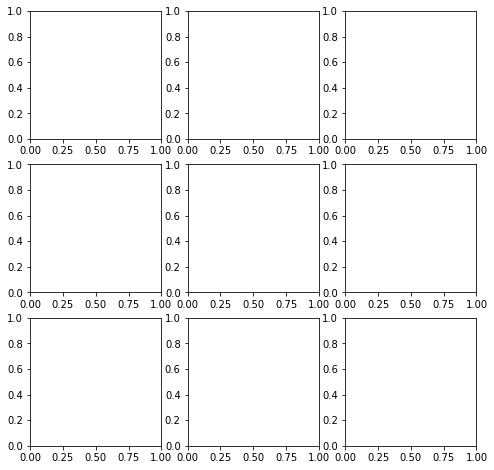

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
   # if i % step_plot == 0 and i < 9 * step_plot:
        #ax = axes.flat[i // step_plot]
        #show_patterns(U, ax=ax)
        #ax.set_title(f'$t={i * dt:.2f}$')
print(U)
print(V)

∂u∂tτ∂v∂t=aΔu+u−u3−v+k=bΔv+u−v

In [8]:
∂u∂tτ∂v∂t=aΔu+u−u3−v+k=bΔv+u−v

SyntaxError: invalid character in identifier (<ipython-input-8-9297546b17ea>, line 1)